In [55]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [56]:
#load the data from drive
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/automobile_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [57]:
#checking no of rows and columns
df.shape

(205, 26)

In [58]:
#getting information about columns in the data
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [59]:
#get information about the data set - the data type of each column, null values, data range etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [60]:
#replace ? data with nan
df.columns = df.columns.str.replace('-', '_')
df.replace('?',np.nan, inplace=True)
df['num_of_doors'].unique()

array(['two', 'four', nan], dtype=object)

In [61]:
df['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [62]:
#replace the words with numbers
wtn={'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num_of_doors']=df['num_of_doors'].map(wtn)
df['num_of_cylinders']=df['num_of_cylinders'].map(wtn)

In [63]:
#seeing the columns which have integer data
df.select_dtypes(include=[int,float]).columns

Index(['symboling', 'num_of_doors', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'num_of_cylinders', 'engine_size', 'compression_ratio',
       'city_mpg', 'highway_mpg'],
      dtype='object')

In [64]:
# Convert applicable columns to numeric types where possible
numeric_columns = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
# fill missing numeric values with mean
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)
# fill missing categorical data with mode
df['num_of_doors'].fillna(df['num_of_doors'].mode()[0], inplace=True)
df['num_of_cylinders'].fillna(df['num_of_cylinders'].mode()[0], inplace=True)
df.isnull().sum()

,0
symboling,0
normalized_losses,0
make,0
fuel_type,0
aspiration,0
num_of_doors,0
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


In [65]:
df.select_dtypes(include=object).columns

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

In [66]:
#drop duplicate values if any found
df=df.drop_duplicates()

<ipython-input-67-1f965843f735>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=10)


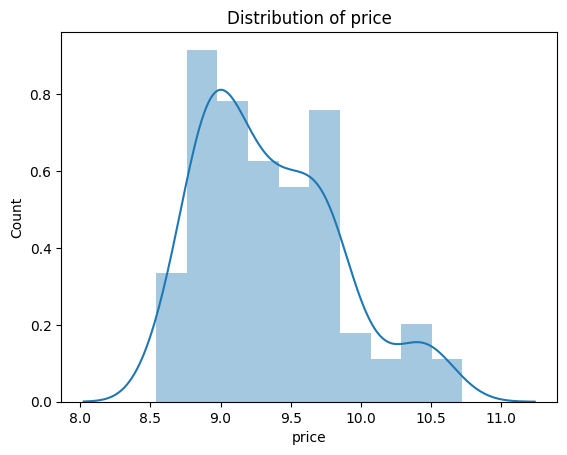

In [67]:
#distribution of target variable price
df['price']=np.log(df['price'])
sns.distplot(df['price'], bins=10)
plt.title("Distribution of price")
plt.xlabel("price")
plt.ylabel("Count")
plt.show()

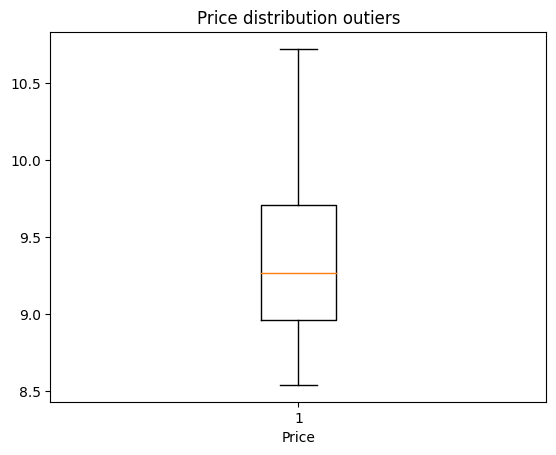

In [68]:
plt.boxplot(df['price'])
plt.xlabel('Price')
plt.title('Price distribution outiers')
plt.show()

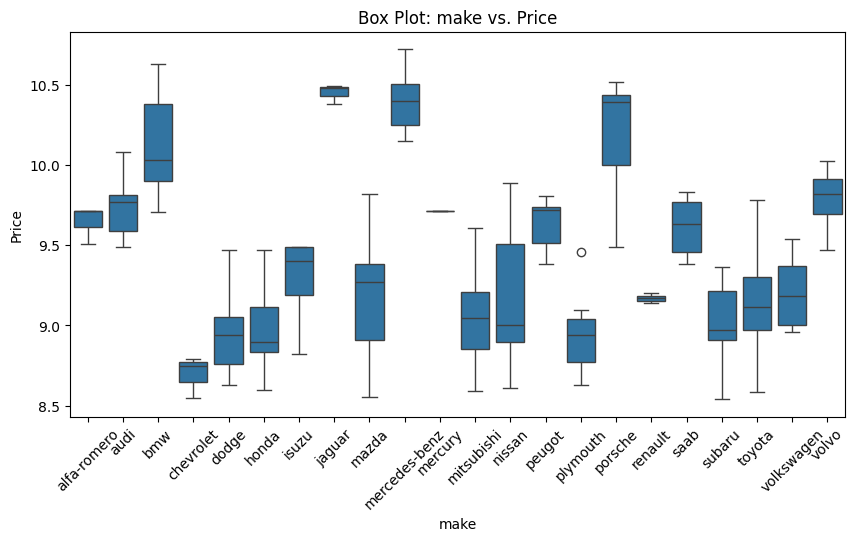

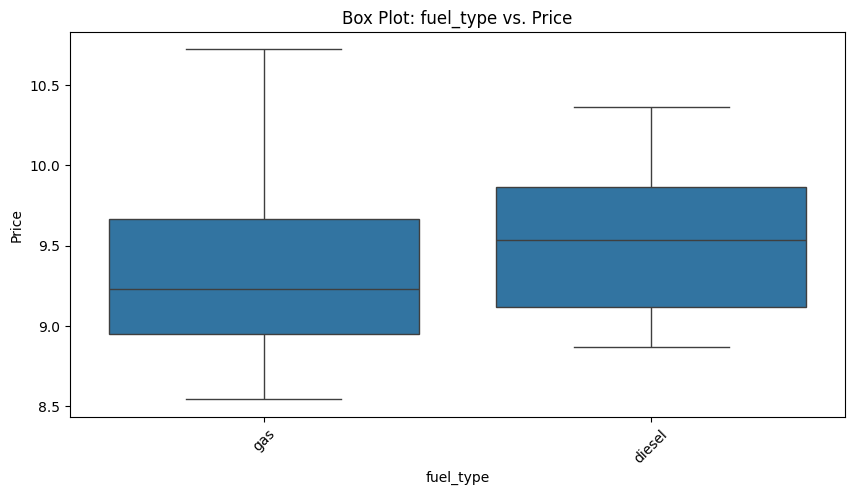

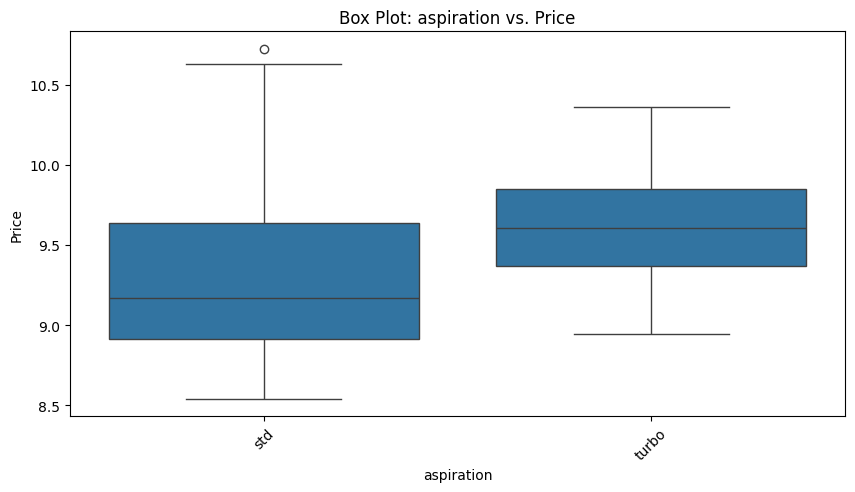

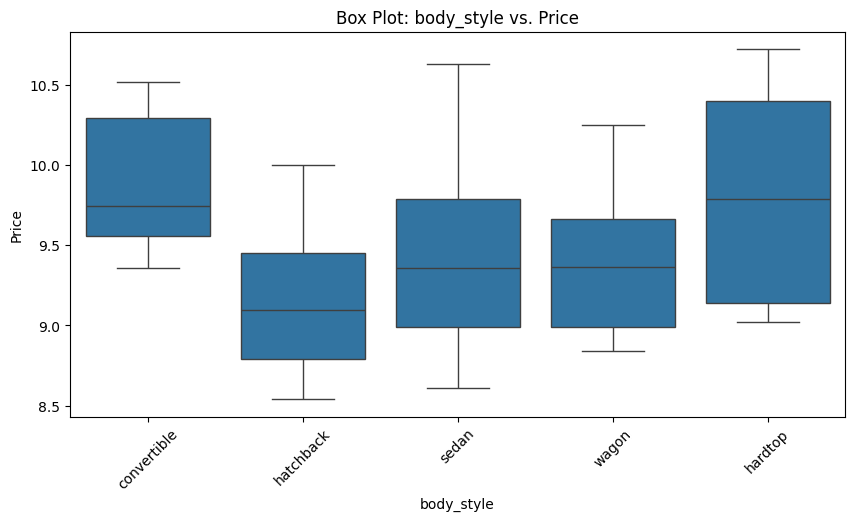

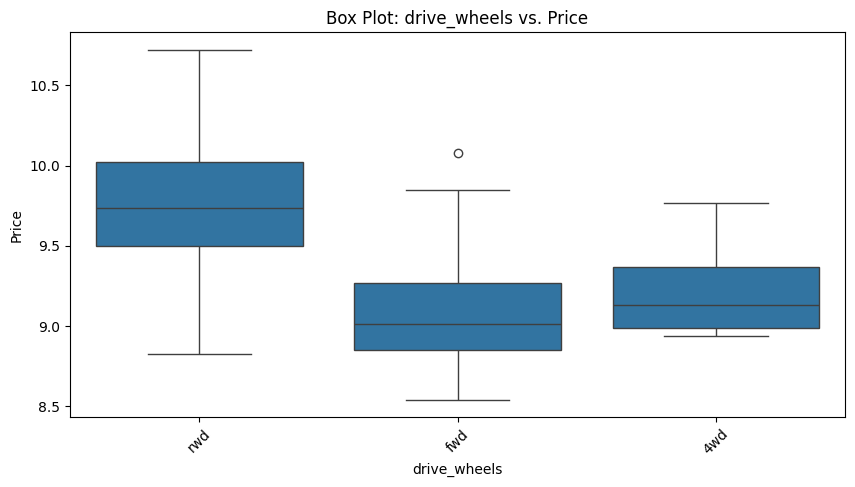

In [69]:
# Loop through each categorical column
categorical_column=['make','fuel_type','aspiration','body_style','drive_wheels']
for column in categorical_column:
    plt.figure(figsize=(10,5))

    # Create a box plot
    sns.boxplot(data=df, x=column, y='price')

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Box Plot: {column} vs. Price')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

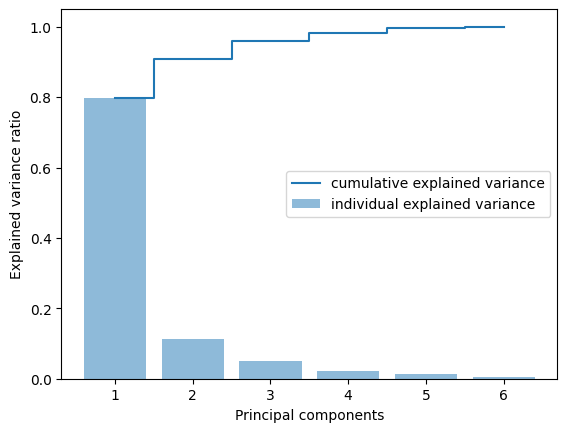

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,peak_rpm,city_mpg,highway_mpg,price,PC1,PC2,PC3,PC4,PC5,PC6
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,5000.0,21,27,9.510075,-0.051616,1.147984,0.423501,0.275502,-0.242857,0.080613
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,5000.0,21,27,9.711116,-0.051616,1.147984,0.423501,0.275502,-0.242857,0.080613
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,5000.0,19,26,9.711116,-1.226609,1.255094,-0.382052,0.251704,-0.161820,0.135711
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,5500.0,24,30,9.543235,-0.056505,0.031309,0.235156,-0.210405,0.428170,-0.041833
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,5500.0,18,22,9.767095,-1.496764,0.702264,0.654726,-0.206083,-0.277067,-0.049291


In [70]:
# Columns to perform PCA on
columns_for_pca = ['length', 'width', 'curb_weight','horsepower', 'city_mpg', 'highway_mpg']
data_for_pca = df[columns_for_pca]

from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs in descending order
eig_pairs.sort(reverse=True)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sorted = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

# Calculate explained variance ratios and cumulative explained variance
var_explained = eigvalues_sorted / np.sum(eigvalues_sorted)
cum_var_explained = np.cumsum(var_explained)

# Plot explained variance ratios
plt.bar(range(1, len(var_explained) + 1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_explained) + 1), cum_var_explained, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Select the number of principal components to keep based on explained variance
num_components = 6

# Reduce dimensionality using selected number of components
P_reduce = eigvectors_sorted[:num_components]
X_std_reduced = np.dot(scaled_data, P_reduce.T)

# Convert the reduced data to a DataFrame
pca_columns = [f"PC{i + 1}" for i in range(num_components)]
pca_df = pd.DataFrame(data=X_std_reduced, columns=pca_columns)

# Concatenate PCA results with the original DataFrame
final_df = pd.concat([df, pca_df], axis=1)

# Print the final DataFrame with PCA components
final_df.head()

In [90]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels','engine_location','engine_type','fuel_system'])
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   symboling  normalized_losses  num_of_doors  wheel_base  length  width  \
0          3              122.0           2.0        88.6   168.8   64.1   
1          3              122.0           2.0        88.6   168.8   64.1   
2          1              122.0           2.0        94.5   171.2   65.5   
3          2              164.0           4.0        99.8   176.6   66.2   
4          2              164.0           4.0        99.4   176.6   66.4   

   height  curb_weight  num_of_cylinders  engine_size  ...  engine_type_ohcv  \
0    48.8         2548                 4          130  ...             False   
1    48.8         2548                 4          130  ...             False   
2    52.4         2823                 6          152  ...              True   
3    54.3         2337                 4          109  ...             False   
4    54.3         2824                 5          136  ...             False   

   engine_type_rotor  fuel_system_1bbl  fuel_system_2bbl  fuel

In [91]:
#divide the data into test and train
target = 'price'
X = df_encoded.drop(target,axis=1)
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 68)
(62, 68)
(143,)
(62,)


In [93]:
# # Step 3: Correlation analysis to see the relationship with price
# # Assuming 'price' is the target variable you're predicting
# correlation_matrix = df_encoded.corr()
# print(correlation_matrix['price'])

In [99]:
# Step 4: Regression model to predict price using curb weight ratio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.030174567615361348
